# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

In [2]:
warnings.filterwarnings('ignore')

# Preprocessing

In [3]:
#print(check_output(["ls", "../input/Data/Stocks"]).decode("utf8"))

# Stock Market Analyis

In [118]:
df = pd.read_csv(fr"./archive/all_stocks_5yr.csv")
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [119]:
Name = 'AAPL'
df = df[df['Name'] == Name]
df.set_index('date', inplace=True)
df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL


In [120]:
print(df.head())
print(df.shape)
print(df.columns)

               open     high      low    close     volume  Name
date                                                           
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
(1259, 6)
Index(['open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


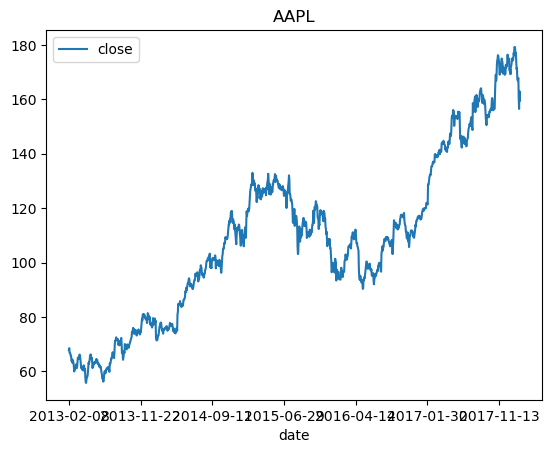

In [121]:
df[['close']].plot()
plt.title(f"{Name}")
plt.show()

Text(0.5, 1.0, 'AAPL Cumulative Returns')

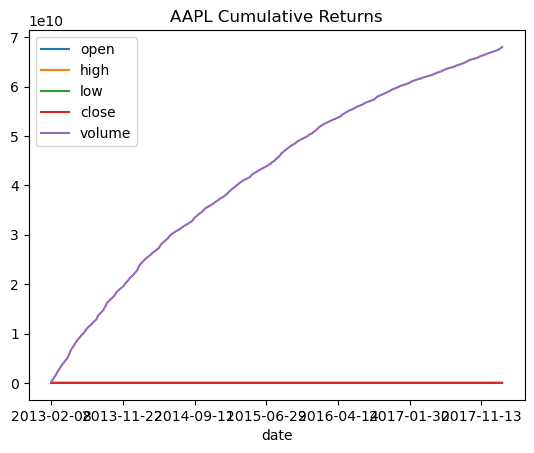

In [122]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title(f'{Name} Cumulative Returns')

Text(0.5, 1.0, 'AAPL Autocorrelation plot')

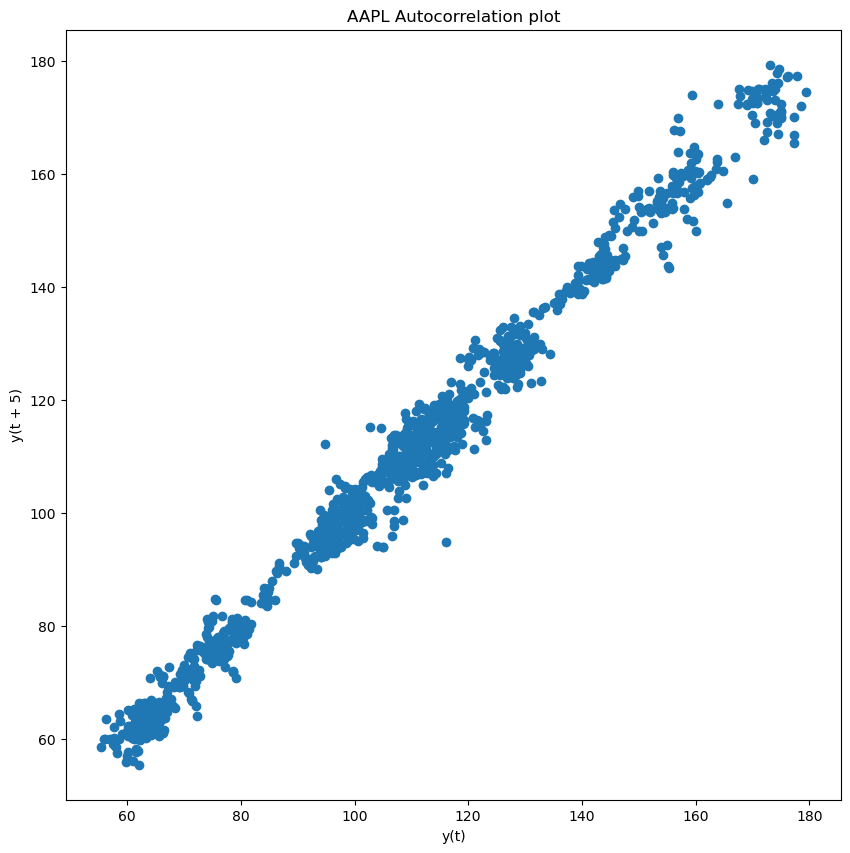

In [123]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=5)
plt.title(f'{Name} Autocorrelation plot')

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

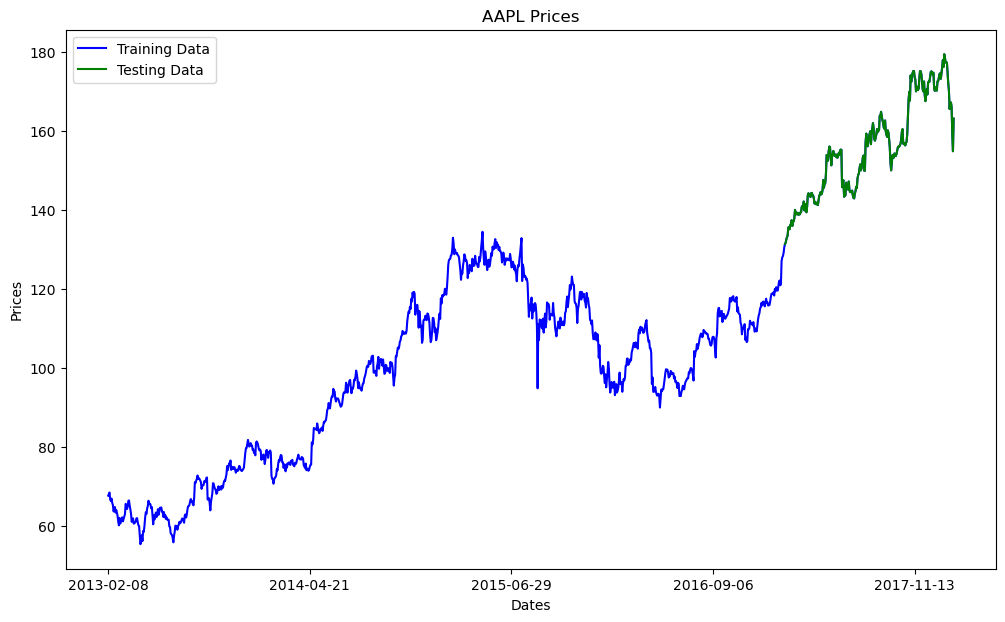

In [124]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
len_train = len(train_data)
len_test = len(test_data)
plt.figure(figsize=(12,7))
plt.title(f'{Name} Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['open'], 'blue', label='Training Data' )
plt.plot(test_data['open'], 'green', label='Testing Data')
#plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(df), 300), df.index[0:len(df):300])
plt.legend()

In [125]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [126]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values

history = [x for x in train_ar]

model = auto_arima(history, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

order = model.get_params()['order']

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3907.715, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3932.851, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3906.032, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3907.789, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3932.199, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3907.675, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3909.662, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3905.907, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3907.480, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3907.536, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3907.721, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3909.458, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.334 seconds


In [127]:
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order= order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 3.589
Symmetric mean absolute percentage error: 0.839


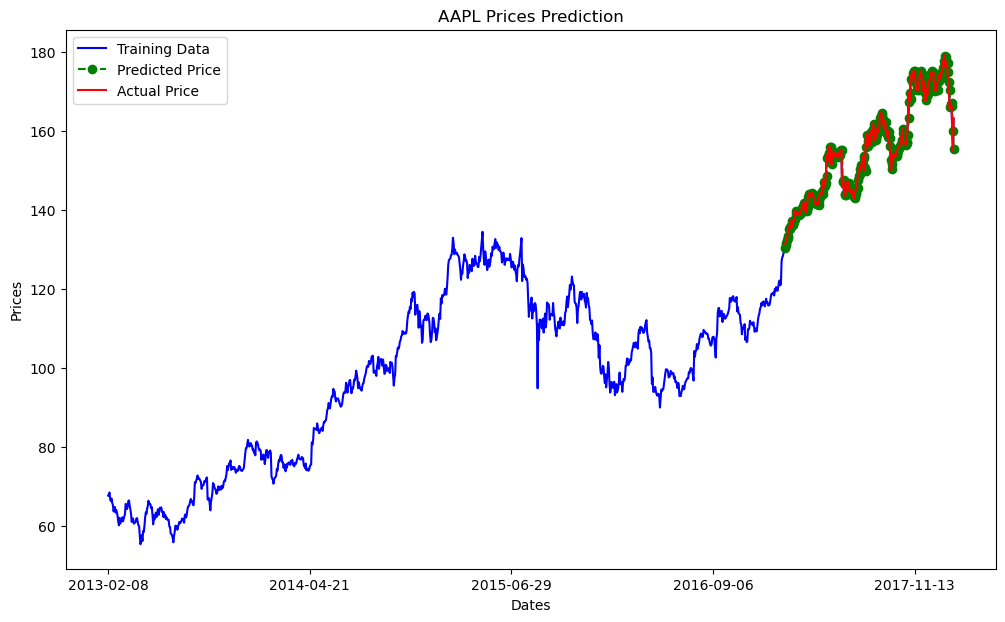

In [128]:
plt.figure(figsize=(12,7))
plt.plot(df['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.title(f'{Name} Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df), 300), df.index[0:len(df):300])
plt.legend()

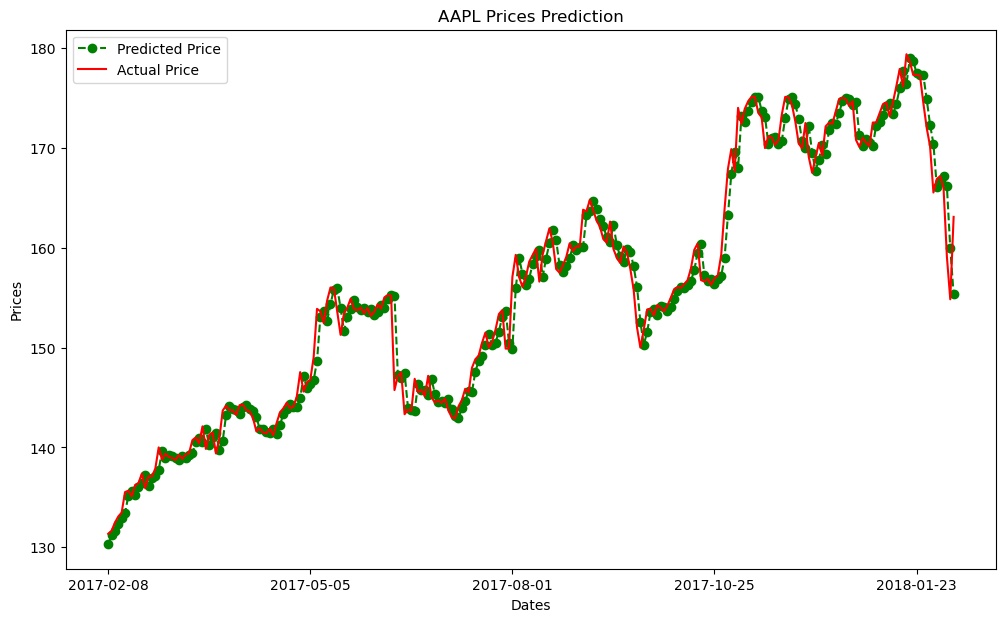

In [129]:
plt.figure(figsize=(12,7))
plt.plot(predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data['open'], color='red', label='Actual Price')
plt.xticks(df.index[len_train:len(df):60])
plt.title(f'{Name} Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [130]:
future_predictions = []
future_history = [x for x in df['open'].values]

for t in range(10):
    model = ARIMA(future_history, order= order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    future_predictions.append(yhat)
    future_history.append(yhat)
    future_history = future_history[1:]



In [131]:
import pandas as pd

y = pd.Series(df["open"])
y

date
2013-02-08     67.7142
2013-02-11     68.0714
2013-02-12     68.5014
2013-02-13     66.7442
2013-02-14     66.3599
                ...   
2018-02-01    167.1650
2018-02-02    166.0000
2018-02-05    159.1000
2018-02-06    154.8300
2018-02-07    163.0850
Name: open, Length: 1259, dtype: float64

In [157]:
import pandas as pd
from pmdarima.arima import auto_arima

# convertir los datos en una serie de tiempo
y = pd.Series(df['open'])

# ajustar el modelo ARIMA usando auto_arima
model = auto_arima(y)

# hacer predicciones para los próximos 100 días
preds = model.predict(n_periods=261)

# generar un rango de fechas para los próximos 100 días
date_range = pd.date_range(start=y.index[-1], periods=261, freq=pd.offsets.BDay())

# crear un DataFrame con las predicciones y establecer el índice de fecha
preds_df = pd.DataFrame({'preds': preds, 'date': date_range})
fecha_formato = '%Y-%m-%d'
preds_df['date'] = pd.to_datetime(preds_df['date']).dt.strftime(fecha_formato)
preds_df.set_index('date', inplace=True)

# imprimir el DataFrame de predicciones
print(preds_df)

                 preds
date                  
2018-02-07  162.131148
2018-02-08  162.335570
2018-02-09  162.394307
2018-02-12  162.471368
2018-02-13  162.546124
...                ...
2019-01-31  181.449538
2019-02-01  181.524551
2019-02-04  181.599565
2019-02-05  181.674578
2019-02-06  181.749592

[261 rows x 1 columns]


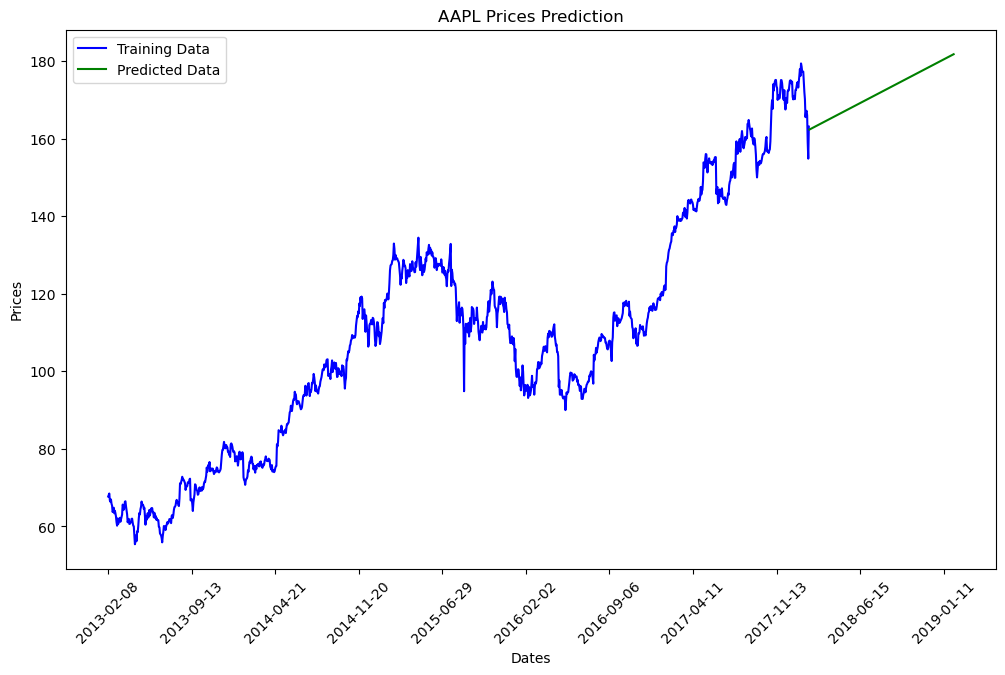

In [158]:
new_index_df = pd.concat([df[['open']], preds_df.iloc[1:]])
plt.figure(figsize=(12,7))
plt.plot(new_index_df['open'].values, 'green', color='blue', label='Training Data')
plt.plot(new_index_df['preds'].values, 'green', color='green', label='Predicted Data')
plt.title(f'{Name} Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(new_index_df), 150), new_index_df.index[0:len(new_index_df):150], rotation=45)
plt.legend()

In [141]:
preds_df

,preds
date,
2018-02-07,162.131148
2018-02-08,162.335570
2018-02-09,162.394307
2018-02-12,162.471368
2018-02-13,162.546124
...,...
2019-01-31,181.449538
2019-02-01,181.524551
2019-02-04,181.599565
